In [23]:
import os
import pandas as pd
import numpy as np
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE, r2_score
from sklearn.metrics import accuracy_score
import yfinance as yf
from matplotlib import pyplot
from fastai.tabular.all import add_datepart

In [24]:
ticker = 'CL=F' # stock ticker symbol: WTI Crude Oil
period = 'max' # time range to look at: all time
interval = '1d' # time interval for data collected: daily
data_s = 'Open' # Low, High, Open, Close, Volume

In [25]:
def get_hist(ticker, time, interval):
    tick = yf.Ticker(ticker)
    return tick.history(period=time, interval=interval)

In [26]:
# get historic data
df = get_hist(ticker, period, interval)

In [27]:
# reformat data
df = df.loc[::-1]
df.reset_index()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2023-02-02 00:00:00-05:00,76.790001,77.239998,74.970001,75.830002,303795,0.0,0.0
1,2023-02-01 00:00:00-05:00,79.059998,79.730003,76.050003,76.410004,312734,0.0,0.0
2,2023-01-31 00:00:00-05:00,77.910004,79.250000,76.550003,78.870003,312734,0.0,0.0
3,2023-01-30 00:00:00-05:00,80.040001,80.489998,77.660004,77.900002,327426,0.0,0.0
4,2023-01-27 00:00:00-05:00,81.220001,82.480003,79.040001,79.680000,367588,0.0,0.0
...,...,...,...,...,...,...,...,...
5633,2000-08-29 00:00:00-04:00,32.820000,33.029999,32.560001,32.720001,49131,0.0,0.0
5634,2000-08-28 00:00:00-04:00,32.040001,32.919998,31.860001,32.869999,46770,0.0,0.0
5635,2000-08-25 00:00:00-04:00,31.700001,32.099998,31.320000,32.049999,44601,0.0,0.0
5636,2000-08-24 00:00:00-04:00,31.900000,32.240002,31.400000,31.629999,72978,0.0,0.0


KeyError: 'Date'

In [9]:
add_datepart(df, 'Date', drop=False)
df.drop('Elapsed', axis=1, inplace=True)  # don't need this

KeyError: 'Date'

In [ ]:
date = df.reset_index()['Date']

# add dates as dataframe columns
df['year'] = date.dt.year.values
df['month'] = date.dt.month.values
df['day'] = date.dt.day.values

# gets rid of datetime indexing
df = df.reset_index()
df = df.drop('Date', axis=1)

In [ ]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,year,month,day
0,76.790001,77.239998,74.970001,76.379997,246474,0.0,0.0,2023,2,2
1,79.059998,79.730003,76.050003,76.410004,312734,0.0,0.0,2023,2,1
2,77.910004,79.250000,76.550003,78.870003,312734,0.0,0.0,2023,1,31
3,80.040001,80.489998,77.660004,77.900002,327426,0.0,0.0,2023,1,30
4,81.220001,82.480003,79.040001,79.680000,367588,0.0,0.0,2023,1,27


In [ ]:
test = df.drop(df.tail(5300).index, inplace = False)
train = df
y_train = train[data_s]
X_train = train.drop(columns=data_s)
y_test = test[data_s]
X_test = test.drop(columns=data_s)

In [ ]:
# dates = {
#     'year':[],
#     'month':[],
#     'day':[]
# }
# for i in range(5):
#     dates['year'] += [2023]
#     dates['month'] += [1]
#     dates['day'] += [25+i]
# future = pd.DataFrame.from_dict(dates)
# future

In [ ]:
# Instantiation
model = xg.XGBRegressor(eta=.11, objective='reg:squarederror', max_depth=4, n_estimators=100, seed=123)

In [ ]:
# Fitting the model
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.11, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [ ]:
# Predict the model
yhat = model.predict(X_test)

In [ ]:
print(len(yhat))
print(yhat[0])
print(y_test[0])

338
76.01902
76.79000091552734


In [ ]:
# RMSE Computation
rmse = np.sqrt(MSE(y_test, yhat))

In [ ]:

print("RMSE : % f" %(rmse))

RMSE :  0.934694


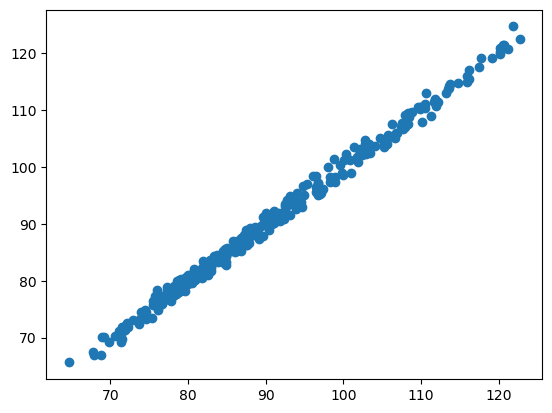

In [ ]:
pyplot.scatter(yhat, y_test)
pyplot.show()

In [ ]:
# todo:
# graph loss
# setup a prediction view method
# predict future
# make test set the last year instead of 5000
# run daily
# adjusted closing prices of the last N=10 days
# year
# month
# week
# dayofmonth
# dayofweek
# dayofyear
# is_month_end
# is_month_start
# is_quarter_end
# is_quarter_start
# is_year_end
# is_year_start